In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [3]:
data = pd.read_csv("hotel_bookings.csv")
data = data.copy()
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
# data tipi hakkında bilgiler
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# data'nın boyutu
data.shape

(119390, 32)

In [6]:
# data'nın bazı istatistik bilgileri
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
# data'nın ne kadar eksik verisi olduğuna bakalım
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# eksik verilerin data'da yüzde kaç eksik olduğuna bakalım
data.isna().sum() / data.shape[0] * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

company kolonunun %94.30 olması bizim bu kolonu doldurabilecek yeterli veri olmadığını böylece ileriki kullanımda bu kolonun kaldırılması daha mantıklı olabilir.

In [9]:
# Birazda verilerin kendi içindeki değerlerine bakalım
data["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [10]:
data["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [11]:
data["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [12]:
data["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [13]:
data["customer_type"].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

## Eksik Verilerin Doldurulması

Burada birkaç metod deneyeceğiz bu metodlara göre en iyi sonuç vereni uygulayacağız

1.Deneme

2.Deneme

3.Deneme

Agent veya Company gibi bazı kategorik değişkenlerde kategorilerden biri olarak “NULL” sunulmaktadır. Bu eksik bir değer olarak değil, “uygulanamaz” olarak değerlendirilmelidir. Örneğin, bir rezervasyon "Acente", "NULL" olarak tanımlanırsa, rezervasyonun bir seyahat acentesinden gelmediği anlamına gelir.

In [14]:
data["agent"] = data["agent"].fillna("Not Applicable")
data["company"] = data["company"].fillna("Not Applicable")
data["children"] = data["children"].fillna(0)
data["country"] = data["country"].fillna("Unknown")

Ebeveyn, çocuk ve bebek = 0 olanları kaldıralım. Çünkü müşteri olmadığı anlamına gelir

In [15]:
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
data['country']= data['country'].astype(str)

In [18]:
le = LabelEncoder()
data['hotel'] = le.fit_transform(data['hotel'])
data['meal'] = le.fit_transform(data['meal'])
data['country'] = le.fit_transform(data['country'])
data['market_segment']= le.fit_transform(data['market_segment'])
data['distribution_channel']=le.fit_transform(data['distribution_channel'])
data['reserved_room_type'] = le.fit_transform(data['reserved_room_type'])
data['assigned_room_type'] = le.fit_transform(data['assigned_room_type'])
data['deposit_type'] = le.fit_transform(data['deposit_type'])
data['customer_type'] = le.fit_transform(data['customer_type'])
data['reservation_status'] = le.fit_transform(data['reservation_status'])
data['agent'] = le.fit_transform(data['agent'].astype(str))
data['company'] = le.fit_transform(data['company'].astype(str))

In [19]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  int32         
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64

In [21]:
data['arrival_date'] = data['arrival_date_year'].map(str) + '-' + data['arrival_date_month'].map(str) + '-' \
                       + data['arrival_date_day_of_month'].map(str)

In [22]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
#data['arrival_date'] = data["arrival_date"].values.astype('datetime64[D]')
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [23]:
data['Total Guests'] = data['adults'] + data['children'] + data["babies"]

In [24]:
data = data[data['Total Guests'] != 0]

In [25]:
data['Total Stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

<AxesSubplot:>

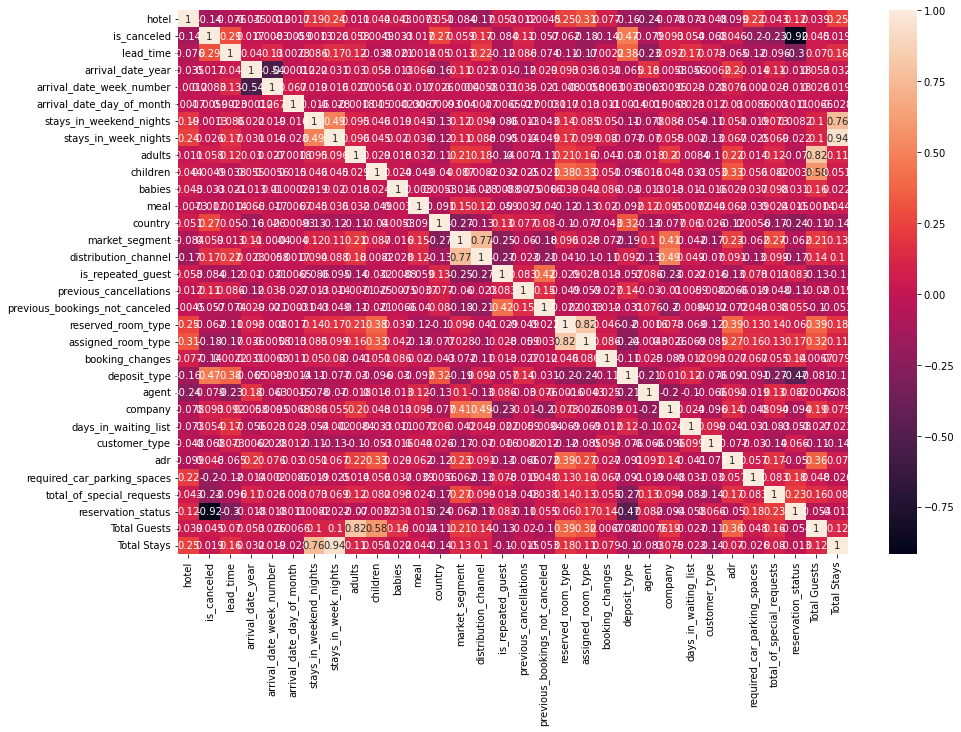

In [26]:
plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr , annot=True)

In [28]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , cross_val_predict
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , log_loss
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'Total Guests', 'Total Stays'],
      dtype='object')

In [30]:
data = data.drop(["arrival_date_year" , "arrival_date_month", "arrival_date_week_number" , "arrival_date_day_of_month"] , axis=1)

In [31]:
data = data.drop(["arrival_date"] , axis=1)

In [32]:
data = data.drop(["adults" , "children", "babies"] , axis=1)

In [33]:
data = data.drop(["stays_in_weekend_nights" , "stays_in_week_nights"] , axis=1)

In [34]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'Total Guests', 'Total Stays'],
      dtype='object')

In [175]:
data.head(10)

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total Guests,Total Stays
0,1,0,342,0,135,3,1,0,0,0,...,348,0,2,0.0,0,0,1,2015-07-01,2.0,0
1,1,0,737,0,135,3,1,0,0,0,...,348,0,2,0.0,0,0,1,2015-07-01,2.0,0
2,1,0,7,0,59,3,1,0,0,0,...,348,0,2,75.0,0,0,1,2015-07-02,1.0,1
3,1,0,13,0,59,2,0,0,0,0,...,348,0,2,75.0,0,0,1,2015-07-02,1.0,1
4,1,0,14,0,59,6,3,0,0,0,...,348,0,2,98.0,0,1,1,2015-07-03,2.0,2
5,1,0,14,0,59,6,3,0,0,0,...,348,0,2,98.0,0,1,1,2015-07-03,2.0,2
6,1,0,0,0,135,3,1,0,0,0,...,348,0,2,107.0,0,0,1,2015-07-03,2.0,2
7,1,0,9,1,135,3,1,0,0,0,...,348,0,2,103.0,0,1,1,2015-07-03,2.0,2
8,1,1,85,0,135,6,3,0,0,0,...,348,0,2,82.0,0,1,0,2015-05-06,2.0,3
9,1,1,75,2,135,5,3,0,0,0,...,348,0,2,105.5,0,0,0,2015-04-22,2.0,3


In [36]:
X = data.drop(["reservation_status" , "reservation_status_date"] , axis=1)
y = data["reservation_status"] 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state=42)

In [164]:
data["reservation_status"].value_counts()

1    75011
0    42993
2     1206
Name: reservation_status, dtype: int64

## Logistic Regression

In [38]:
loj = LogisticRegression()
loj_model = loj.fit(x_train , y_train)
loj_model

LogisticRegression()

In [39]:
y_pred = loj_model.predict(x_test)

In [40]:
accuracy_score(y_test , y_pred)

0.9217347537958225

In [41]:
cross_val_score(loj_model , x_test , y_test , cv=10).mean()

0.8845994543813663

In [42]:
conf = confusion_matrix(y_test , y_pred)
conf

array([[11902,  1001,    52],
       [ 1282, 21057,   122],
       [  233,   109,     5]], dtype=int64)

In [43]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12955
           1       0.95      0.94      0.94     22461
           2       0.03      0.01      0.02       347

    accuracy                           0.92     35763
   macro avg       0.62      0.62      0.62     35763
weighted avg       0.92      0.92      0.92     35763



## Gaussian NB

In [44]:
nb = GaussianNB()
nb_model = nb.fit(x_train , y_train)
nb_model

GaussianNB()

In [45]:
y_pred = nb_model.predict(x_test)

In [46]:
accuracy_score(y_test , y_pred)

0.7851410675838156

In [47]:
cross_val_score(nb_model , x_test , y_test , cv=10).mean()

0.7821492989951336

In [48]:
conf = confusion_matrix(y_test , y_pred)
conf

array([[ 5283,     0,  7672],
       [    0, 22461,     0],
       [   12,     0,   335]], dtype=int64)

In [49]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.41      0.58     12955
           1       1.00      1.00      1.00     22461
           2       0.04      0.97      0.08       347

    accuracy                           0.79     35763
   macro avg       0.68      0.79      0.55     35763
weighted avg       0.99      0.79      0.84     35763



## KNN

In [50]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train , y_train)
knn_model

KNeighborsClassifier()

In [51]:
y_pred = knn_model.predict(x_test)

In [52]:
accuracy_score(y_test , y_pred)

0.8125157285462629

In [53]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     12955
           1       0.84      0.87      0.86     22461
           2       0.71      0.13      0.22       347

    accuracy                           0.81     35763
   macro avg       0.77      0.58      0.61     35763
weighted avg       0.81      0.81      0.81     35763



In [54]:
knn_params = {"n_neighbors" : np.arange(1,10)}

In [55]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn , knn_params , cv=10)
knn_cv.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [56]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi paramtreler: " + str(knn_cv.best_params_))

En iyi skor: 0.8127794228061539
En iyi paramtreler: {'n_neighbors': 1}


In [57]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(x_train , y_train)

In [58]:
knn_tuned.score(x_test , y_test)

0.8202052400525683

In [59]:
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.8202052400525683

In [60]:
acs = accuracy_score(y_test , y_pred)
acs

0.8202052400525683

In [61]:
clf_report_knn = classification_report(y_test, y_pred)
print(clf_report_knn)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     12955
           1       0.86      0.86      0.86     22461
           2       0.28      0.25      0.27       347

    accuracy                           0.82     35763
   macro avg       0.64      0.63      0.63     35763
weighted avg       0.82      0.82      0.82     35763



## SVC

## Decision Tree Classifier

In [62]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(x_train , y_train)
cart_model

DecisionTreeClassifier()

In [63]:
y_pred = cart_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.9861029555686044

Model Tuning

In [64]:
cart_grid = {"max_depth": list(range(1,5)),
             "min_samples_split": list(range(2,5))} 

In [65]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart , cart_grid , cv = 10 , n_jobs = -1 , verbose = 2)
cart_cv_model = cart_cv.fit(x_train , y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [66]:
print("En iyi paramtreler: " + str(cart_cv_model.best_params_))

En iyi paramtreler: {'max_depth': 3, 'min_samples_split': 2}


In [97]:
cart = tree.DecisionTreeClassifier(max_depth = 3 , min_samples_split = 2 )
cart_tuned = cart.fit(x_train , y_train)

In [98]:
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.9903811201521125

In [99]:
acs_cart = accuracy_score(y_test , y_pred)
acs_cart

0.9903811201521125

In [100]:
clf_report_cart = classification_report(y_test, y_pred)
print(clf_report_cart)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       0.71      0.01      0.03       347

    accuracy                           0.99     35763
   macro avg       0.90      0.67      0.67     35763
weighted avg       0.99      0.99      0.99     35763



In [160]:
Importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

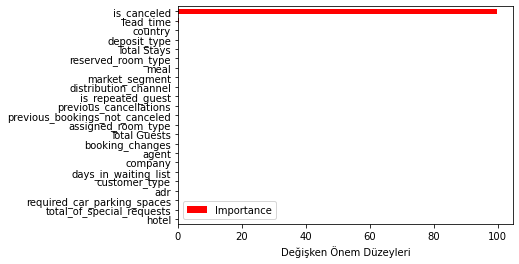

In [161]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

### Random Forest

In [71]:
rf_model = RandomForestClassifier().fit(x_train , y_train)
rf_model

RandomForestClassifier()

In [72]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.9923943740737634

Model Tuning

In [73]:
rf_params = {"max_depth": [2,5],
             "max_features": [5,8],
             "n_estimators": [100,500],
             "min_samples_split": [2,5]}

In [74]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model , 
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
rf_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': [5, 8],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500]},
             verbose=2)

In [75]:
print("En iyi paramtreler: " + str(rf_cv_model.best_params_))

En iyi paramtreler: {'max_depth': 5, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [101]:
rf_tuned = RandomForestClassifier(max_depth = 5,
                                  min_samples_split = 2,
                                  n_estimators = 100,
                                  max_features = 8)
rf_tuned.fit(x_train , y_train)

RandomForestClassifier(max_depth=5, max_features=8)

In [102]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.9905488913122501

In [103]:
acs_rf = accuracy_score(y_test , y_pred)
acs_rf

0.9905488913122501

In [104]:
clf_report_rf = classification_report(y_test, y_pred)
print(clf_report_rf)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       1.00      0.03      0.05       347

    accuracy                           0.99     35763
   macro avg       0.99      0.68      0.68     35763
weighted avg       0.99      0.99      0.99     35763



In [105]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

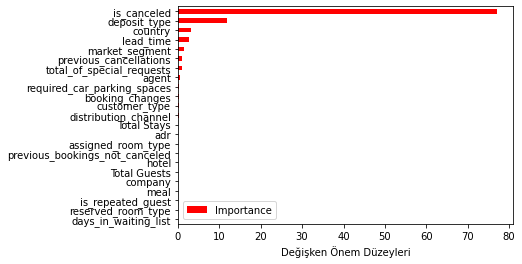

In [106]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

### GBM

In [82]:
gbm_model = GradientBoostingClassifier().fit(x_train , y_train)

In [83]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.9904370438721584

Model Tuning

In [84]:
gbm_params = {"learning_rate": [0.01,0.1,0.05],
              "n_estimators": [100,500],
              "max_depth": [3,5],
              "min_samples_split": [2,5]}

In [85]:
gbm = GradientBoostingClassifier()

gbm_cv_model = GridSearchCV(gbm , gbm_params , n_jobs = -1 , verbose = 2)
gbm_cv_model.fit(x_train , y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 500]},
             verbose=2)

In [86]:
print("En iyi paramtreler: " + str(gbm_cv_model.best_params_))

En iyi paramtreler: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [107]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,
                                 n_estimators = 500,
                                 max_depth = 5,
                                 min_samples_split = 2)

In [108]:
gbm_tuned = gbm.fit(x_train , y_train)

In [109]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.991751251293236

In [110]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

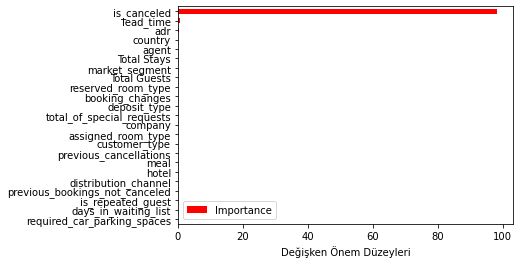

In [111]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

In [112]:
clf_report_gbm = classification_report(y_test, y_pred)
print(clf_report_gbm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       0.66      0.31      0.42       347

    accuracy                           0.99     35763
   macro avg       0.88      0.77      0.80     35763
weighted avg       0.99      0.99      0.99     35763



# XGBoost

In [87]:
xgb_model = XGBClassifier().fit(x_train , y_train)
xgb_model

[15:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [88]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.9918071750132819

Model Tuning

In [89]:
xgb_params = {"n_estimators": [100],
              "subsample": [0.6,0.8],
              "max_depth": [3,4],
              "learning_rate": [0.1,0.02],
              "min_samples_split": [2,5]}

In [90]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb , xgb_params , cv = 10 , n_jobs = -1 , verbose = 2)
xgb_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[15:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [91]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [113]:
xgb = XGBClassifier(learning_rate = 0.1 ,
                    max_depth = 4,
                    min_samples_split = 2,
                    subsample = 0.6,
                    n_estimators = 100)

In [114]:
xgb_tuned = xgb.fit(x_train , y_train)

[18:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.9907446243324106

In [116]:
clf_report_xgb = classification_report(y_test, y_pred)
print(clf_report_xgb)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       0.66      0.10      0.17       347

    accuracy                           0.99     35763
   macro avg       0.88      0.70      0.72     35763
weighted avg       0.99      0.99      0.99     35763



In [180]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

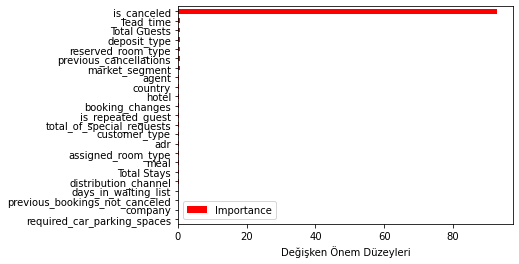

In [181]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

# LightGBM

In [92]:
lgbm_model = LGBMClassifier().fit(x_train , y_train)

In [93]:
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.9915275564130526

Model Tuning

In [94]:
lgbm_params = {"learning_rate": [0.1,0.05],
               "max_depth": [3,4],
               "min_samples_split": [5,10],
               "subsample": [0.6,0.8] ,
               "n_estimators": [100]}

In [95]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm , lgbm_params , cv = 10 , n_jobs = -1 , verbose = 2)
lgbm_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 4],
                         'min_samples_split': [5, 10], 'n_estimators': [100],
                         'subsample': [0.6, 0.8]},
             verbose=2)

In [96]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [117]:
lgbm = LGBMClassifier(learning_rate = 0.1,
                    max_depth = 3,
                    min_samples_split = 5,
                    subsample = 0.6,
                    n_estimators = 100)

In [118]:
lgbm_tuned = lgbm.fit(x_train , y_train)

In [119]:
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.9904929675922043

In [120]:
clf_report_lgbm = classification_report(y_test, y_pred)
print(clf_report_lgbm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       0.57      0.08      0.14       347

    accuracy                           0.99     35763
   macro avg       0.85      0.69      0.71     35763
weighted avg       0.99      0.99      0.99     35763



In [182]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

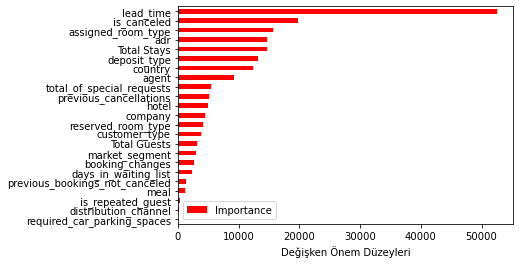

In [183]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

# CatBoost

In [121]:
cat_model = CatBoostClassifier().fit(x_train , y_train)

Learning rate set to 0.099155
0:	learn: 0.9165247	total: 337ms	remaining: 5m 36s
1:	learn: 0.7806992	total: 396ms	remaining: 3m 17s
2:	learn: 0.6746521	total: 476ms	remaining: 2m 38s
3:	learn: 0.5889000	total: 537ms	remaining: 2m 13s
4:	learn: 0.5181229	total: 605ms	remaining: 2m
5:	learn: 0.4589476	total: 669ms	remaining: 1m 50s
6:	learn: 0.4087043	total: 729ms	remaining: 1m 43s
7:	learn: 0.3654186	total: 789ms	remaining: 1m 37s
8:	learn: 0.3281504	total: 844ms	remaining: 1m 32s
9:	learn: 0.2959528	total: 892ms	remaining: 1m 28s
10:	learn: 0.2678062	total: 953ms	remaining: 1m 25s
11:	learn: 0.2428507	total: 1.04s	remaining: 1m 25s
12:	learn: 0.2212315	total: 1.12s	remaining: 1m 25s
13:	learn: 0.2021240	total: 1.18s	remaining: 1m 22s
14:	learn: 0.1852481	total: 1.23s	remaining: 1m 20s
15:	learn: 0.1699533	total: 1.28s	remaining: 1m 18s
16:	learn: 0.1564929	total: 1.36s	remaining: 1m 18s
17:	learn: 0.1444117	total: 1.43s	remaining: 1m 18s
18:	learn: 0.1335509	total: 1.51s	remaining: 1m 

164:	learn: 0.0298070	total: 10s	remaining: 50.8s
165:	learn: 0.0297861	total: 10.1s	remaining: 50.7s
166:	learn: 0.0297748	total: 10.1s	remaining: 50.5s
167:	learn: 0.0297312	total: 10.2s	remaining: 50.4s
168:	learn: 0.0296807	total: 10.2s	remaining: 50.3s
169:	learn: 0.0296592	total: 10.3s	remaining: 50.2s
170:	learn: 0.0296343	total: 10.3s	remaining: 50.1s
171:	learn: 0.0296059	total: 10.4s	remaining: 50s
172:	learn: 0.0295649	total: 10.4s	remaining: 49.9s
173:	learn: 0.0294913	total: 10.5s	remaining: 49.8s
174:	learn: 0.0294770	total: 10.5s	remaining: 49.7s
175:	learn: 0.0294575	total: 10.6s	remaining: 49.6s
176:	learn: 0.0294428	total: 10.6s	remaining: 49.5s
177:	learn: 0.0294165	total: 10.7s	remaining: 49.3s
178:	learn: 0.0292907	total: 10.7s	remaining: 49.3s
179:	learn: 0.0292012	total: 10.8s	remaining: 49.2s
180:	learn: 0.0291960	total: 10.9s	remaining: 49.1s
181:	learn: 0.0291949	total: 10.9s	remaining: 48.9s
182:	learn: 0.0291787	total: 10.9s	remaining: 48.8s
183:	learn: 0.02

325:	learn: 0.0269931	total: 18.3s	remaining: 37.9s
326:	learn: 0.0269715	total: 18.4s	remaining: 37.8s
327:	learn: 0.0269667	total: 18.4s	remaining: 37.7s
328:	learn: 0.0269482	total: 18.5s	remaining: 37.7s
329:	learn: 0.0269417	total: 18.5s	remaining: 37.6s
330:	learn: 0.0269201	total: 18.6s	remaining: 37.5s
331:	learn: 0.0269093	total: 18.6s	remaining: 37.5s
332:	learn: 0.0268889	total: 18.7s	remaining: 37.5s
333:	learn: 0.0268477	total: 18.8s	remaining: 37.5s
334:	learn: 0.0268329	total: 18.9s	remaining: 37.4s
335:	learn: 0.0267885	total: 18.9s	remaining: 37.4s
336:	learn: 0.0267831	total: 19s	remaining: 37.3s
337:	learn: 0.0267813	total: 19s	remaining: 37.2s
338:	learn: 0.0267750	total: 19.1s	remaining: 37.2s
339:	learn: 0.0267670	total: 19.1s	remaining: 37.1s
340:	learn: 0.0267584	total: 19.2s	remaining: 37s
341:	learn: 0.0267411	total: 19.2s	remaining: 37s
342:	learn: 0.0267155	total: 19.3s	remaining: 37s
343:	learn: 0.0267059	total: 19.4s	remaining: 37s
344:	learn: 0.0266781	to

485:	learn: 0.0251933	total: 26.8s	remaining: 28.3s
486:	learn: 0.0251856	total: 26.8s	remaining: 28.3s
487:	learn: 0.0251756	total: 26.9s	remaining: 28.2s
488:	learn: 0.0251713	total: 26.9s	remaining: 28.1s
489:	learn: 0.0251660	total: 27s	remaining: 28.1s
490:	learn: 0.0251492	total: 27s	remaining: 28s
491:	learn: 0.0251403	total: 27.1s	remaining: 28s
492:	learn: 0.0251171	total: 27.1s	remaining: 27.9s
493:	learn: 0.0251119	total: 27.2s	remaining: 27.8s
494:	learn: 0.0251022	total: 27.2s	remaining: 27.8s
495:	learn: 0.0250905	total: 27.3s	remaining: 27.7s
496:	learn: 0.0250727	total: 27.3s	remaining: 27.6s
497:	learn: 0.0250686	total: 27.4s	remaining: 27.6s
498:	learn: 0.0250596	total: 27.4s	remaining: 27.5s
499:	learn: 0.0250568	total: 27.5s	remaining: 27.5s
500:	learn: 0.0250477	total: 27.5s	remaining: 27.4s
501:	learn: 0.0250213	total: 27.6s	remaining: 27.4s
502:	learn: 0.0250023	total: 27.6s	remaining: 27.3s
503:	learn: 0.0249947	total: 27.7s	remaining: 27.2s
504:	learn: 0.024990

648:	learn: 0.0237869	total: 35.6s	remaining: 19.2s
649:	learn: 0.0237850	total: 35.6s	remaining: 19.2s
650:	learn: 0.0237783	total: 35.7s	remaining: 19.1s
651:	learn: 0.0237654	total: 35.7s	remaining: 19.1s
652:	learn: 0.0237574	total: 35.8s	remaining: 19s
653:	learn: 0.0237523	total: 35.8s	remaining: 19s
654:	learn: 0.0237483	total: 35.9s	remaining: 18.9s
655:	learn: 0.0237339	total: 35.9s	remaining: 18.8s
656:	learn: 0.0237251	total: 36s	remaining: 18.8s
657:	learn: 0.0237159	total: 36s	remaining: 18.7s
658:	learn: 0.0236895	total: 36.1s	remaining: 18.7s
659:	learn: 0.0236867	total: 36.1s	remaining: 18.6s
660:	learn: 0.0236761	total: 36.2s	remaining: 18.6s
661:	learn: 0.0236681	total: 36.2s	remaining: 18.5s
662:	learn: 0.0236657	total: 36.3s	remaining: 18.4s
663:	learn: 0.0236564	total: 36.3s	remaining: 18.4s
664:	learn: 0.0236513	total: 36.4s	remaining: 18.3s
665:	learn: 0.0236471	total: 36.4s	remaining: 18.3s
666:	learn: 0.0236329	total: 36.5s	remaining: 18.2s
667:	learn: 0.023625

808:	learn: 0.0226039	total: 44.2s	remaining: 10.4s
809:	learn: 0.0225942	total: 44.2s	remaining: 10.4s
810:	learn: 0.0225925	total: 44.3s	remaining: 10.3s
811:	learn: 0.0225848	total: 44.3s	remaining: 10.3s
812:	learn: 0.0225772	total: 44.4s	remaining: 10.2s
813:	learn: 0.0225681	total: 44.4s	remaining: 10.2s
814:	learn: 0.0225641	total: 44.5s	remaining: 10.1s
815:	learn: 0.0225591	total: 44.6s	remaining: 10s
816:	learn: 0.0225487	total: 44.6s	remaining: 9.99s
817:	learn: 0.0225465	total: 44.7s	remaining: 9.94s
818:	learn: 0.0225347	total: 44.7s	remaining: 9.88s
819:	learn: 0.0225138	total: 44.8s	remaining: 9.83s
820:	learn: 0.0225019	total: 44.8s	remaining: 9.77s
821:	learn: 0.0225003	total: 44.9s	remaining: 9.72s
822:	learn: 0.0224854	total: 44.9s	remaining: 9.66s
823:	learn: 0.0224793	total: 45s	remaining: 9.61s
824:	learn: 0.0224710	total: 45s	remaining: 9.55s
825:	learn: 0.0224585	total: 45.1s	remaining: 9.5s
826:	learn: 0.0224513	total: 45.1s	remaining: 9.44s
827:	learn: 0.02244

969:	learn: 0.0215504	total: 53.2s	remaining: 1.64s
970:	learn: 0.0215415	total: 53.2s	remaining: 1.59s
971:	learn: 0.0215353	total: 53.3s	remaining: 1.53s
972:	learn: 0.0215322	total: 53.3s	remaining: 1.48s
973:	learn: 0.0215271	total: 53.4s	remaining: 1.42s
974:	learn: 0.0215166	total: 53.4s	remaining: 1.37s
975:	learn: 0.0215130	total: 53.5s	remaining: 1.31s
976:	learn: 0.0215113	total: 53.5s	remaining: 1.26s
977:	learn: 0.0215066	total: 53.6s	remaining: 1.2s
978:	learn: 0.0215026	total: 53.6s	remaining: 1.15s
979:	learn: 0.0215012	total: 53.7s	remaining: 1.09s
980:	learn: 0.0214988	total: 53.7s	remaining: 1.04s
981:	learn: 0.0214935	total: 53.8s	remaining: 985ms
982:	learn: 0.0214734	total: 53.8s	remaining: 931ms
983:	learn: 0.0214708	total: 53.9s	remaining: 876ms
984:	learn: 0.0214693	total: 53.9s	remaining: 821ms
985:	learn: 0.0214657	total: 54s	remaining: 766ms
986:	learn: 0.0214611	total: 54s	remaining: 711ms
987:	learn: 0.0214589	total: 54.1s	remaining: 657ms
988:	learn: 0.021

In [122]:
y_pred = cat_model.predict(x_test)
accuracy_score(y_test , y_pred)

0.9911081285127087

Model Tuning

In [123]:
cat_params = {"iterations": [200,500],
              'learning_rate': [0.01,0.05,0.1],
              'depth': [3,5,8]}

In [124]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb , cat_params , cv = 10 , n_jobs =-1 , verbose =2)
catb_cv_model.fit(x_train , y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 0.9153783	total: 209ms	remaining: 1m 44s
1:	learn: 0.7786928	total: 296ms	remaining: 1m 13s
2:	learn: 0.6722058	total: 431ms	remaining: 1m 11s
3:	learn: 0.5861456	total: 613ms	remaining: 1m 16s
4:	learn: 0.5153922	total: 761ms	remaining: 1m 15s
5:	learn: 0.4561592	total: 891ms	remaining: 1m 13s
6:	learn: 0.4058905	total: 1.03s	remaining: 1m 12s
7:	learn: 0.3628882	total: 1.08s	remaining: 1m 6s
8:	learn: 0.3258301	total: 1.21s	remaining: 1m 6s
9:	learn: 0.2935034	total: 1.35s	remaining: 1m 6s
10:	learn: 0.2656079	total: 1.48s	remaining: 1m 5s
11:	learn: 0.2408709	total: 1.63s	remaining: 1m 6s
12:	learn: 0.2193399	total: 1.69s	remaining: 1m 3s
13:	learn: 0.2000683	total: 1.81s	remaining: 1m 3s
14:	learn: 0.1830171	total: 1.95s	remaining: 1m 3s
15:	learn: 0.1679117	total: 2.08s	remaining: 1m 2s
16:	learn: 0.1544836	total: 2.22s	remaining: 1m 3s
17:	learn: 0.1424681	total: 2.35s	remaining: 1m 2s
18:	learn: 0.1318642	t

161:	learn: 0.0277525	total: 22.5s	remaining: 46.8s
162:	learn: 0.0277140	total: 22.6s	remaining: 46.8s
163:	learn: 0.0277006	total: 22.8s	remaining: 46.6s
164:	learn: 0.0276863	total: 22.9s	remaining: 46.5s
165:	learn: 0.0276288	total: 23s	remaining: 46.3s
166:	learn: 0.0276198	total: 23.2s	remaining: 46.2s
167:	learn: 0.0275812	total: 23.3s	remaining: 46.1s
168:	learn: 0.0275288	total: 23.5s	remaining: 46s
169:	learn: 0.0275007	total: 23.6s	remaining: 45.8s
170:	learn: 0.0274861	total: 23.8s	remaining: 45.7s
171:	learn: 0.0274602	total: 23.9s	remaining: 45.6s
172:	learn: 0.0274198	total: 24.1s	remaining: 45.5s
173:	learn: 0.0273785	total: 24.2s	remaining: 45.3s
174:	learn: 0.0273512	total: 24.3s	remaining: 45.2s
175:	learn: 0.0273349	total: 24.5s	remaining: 45.1s
176:	learn: 0.0273167	total: 24.6s	remaining: 45s
177:	learn: 0.0273100	total: 24.8s	remaining: 44.9s
178:	learn: 0.0272744	total: 24.9s	remaining: 44.7s
179:	learn: 0.0272343	total: 25.1s	remaining: 44.6s
180:	learn: 0.0272

321:	learn: 0.0238460	total: 44.3s	remaining: 24.5s
322:	learn: 0.0237972	total: 44.5s	remaining: 24.4s
323:	learn: 0.0237853	total: 44.6s	remaining: 24.2s
324:	learn: 0.0237612	total: 44.7s	remaining: 24.1s
325:	learn: 0.0237444	total: 44.9s	remaining: 24s
326:	learn: 0.0237214	total: 45s	remaining: 23.8s
327:	learn: 0.0237001	total: 45.1s	remaining: 23.7s
328:	learn: 0.0236958	total: 45.3s	remaining: 23.5s
329:	learn: 0.0236885	total: 45.4s	remaining: 23.4s
330:	learn: 0.0236739	total: 45.5s	remaining: 23.3s
331:	learn: 0.0236612	total: 45.7s	remaining: 23.1s
332:	learn: 0.0236174	total: 45.8s	remaining: 23s
333:	learn: 0.0236119	total: 45.9s	remaining: 22.8s
334:	learn: 0.0236006	total: 46.1s	remaining: 22.7s
335:	learn: 0.0235886	total: 46.2s	remaining: 22.6s
336:	learn: 0.0235825	total: 46.3s	remaining: 22.4s
337:	learn: 0.0235634	total: 46.5s	remaining: 22.3s
338:	learn: 0.0235472	total: 46.6s	remaining: 22.1s
339:	learn: 0.0235398	total: 46.7s	remaining: 22s
340:	learn: 0.023517

481:	learn: 0.0212476	total: 1m 7s	remaining: 2.51s
482:	learn: 0.0212289	total: 1m 7s	remaining: 2.37s
483:	learn: 0.0212179	total: 1m 7s	remaining: 2.23s
484:	learn: 0.0212003	total: 1m 7s	remaining: 2.09s
485:	learn: 0.0211891	total: 1m 7s	remaining: 1.95s
486:	learn: 0.0211821	total: 1m 7s	remaining: 1.81s
487:	learn: 0.0211791	total: 1m 7s	remaining: 1.67s
488:	learn: 0.0211662	total: 1m 8s	remaining: 1.53s
489:	learn: 0.0211601	total: 1m 8s	remaining: 1.39s
490:	learn: 0.0211529	total: 1m 8s	remaining: 1.25s
491:	learn: 0.0211461	total: 1m 8s	remaining: 1.11s
492:	learn: 0.0211344	total: 1m 8s	remaining: 974ms
493:	learn: 0.0211291	total: 1m 8s	remaining: 835ms
494:	learn: 0.0211087	total: 1m 8s	remaining: 696ms
495:	learn: 0.0210930	total: 1m 9s	remaining: 557ms
496:	learn: 0.0210650	total: 1m 9s	remaining: 417ms
497:	learn: 0.0210574	total: 1m 9s	remaining: 278ms
498:	learn: 0.0210308	total: 1m 9s	remaining: 139ms
499:	learn: 0.0210222	total: 1m 9s	remaining: 0us


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001BF8A2FBF70>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [125]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [136]:
catb = CatBoostClassifier(iterations = 500,
                          learning_rate = 0.1,
                          depth = 8)
catb_tuned = catb.fit(x_train , y_train)

0:	learn: 0.9153783	total: 164ms	remaining: 1m 21s
1:	learn: 0.7786928	total: 254ms	remaining: 1m 3s
2:	learn: 0.6722058	total: 386ms	remaining: 1m 4s
3:	learn: 0.5861456	total: 528ms	remaining: 1m 5s
4:	learn: 0.5153922	total: 671ms	remaining: 1m 6s
5:	learn: 0.4561592	total: 837ms	remaining: 1m 8s
6:	learn: 0.4058905	total: 1.04s	remaining: 1m 13s
7:	learn: 0.3628882	total: 1.09s	remaining: 1m 7s
8:	learn: 0.3258301	total: 1.24s	remaining: 1m 7s
9:	learn: 0.2935034	total: 1.41s	remaining: 1m 9s
10:	learn: 0.2656079	total: 1.57s	remaining: 1m 9s
11:	learn: 0.2408709	total: 1.73s	remaining: 1m 10s
12:	learn: 0.2193399	total: 1.79s	remaining: 1m 7s
13:	learn: 0.2000683	total: 1.94s	remaining: 1m 7s
14:	learn: 0.1830171	total: 2.08s	remaining: 1m 7s
15:	learn: 0.1679117	total: 2.22s	remaining: 1m 7s
16:	learn: 0.1544836	total: 2.35s	remaining: 1m 6s
17:	learn: 0.1424681	total: 2.52s	remaining: 1m 7s
18:	learn: 0.1318642	total: 2.67s	remaining: 1m 7s
19:	learn: 0.1222274	total: 2.81s	rema

161:	learn: 0.0277525	total: 23.4s	remaining: 48.9s
162:	learn: 0.0277140	total: 23.6s	remaining: 48.7s
163:	learn: 0.0277006	total: 23.7s	remaining: 48.5s
164:	learn: 0.0276863	total: 23.8s	remaining: 48.4s
165:	learn: 0.0276288	total: 24s	remaining: 48.2s
166:	learn: 0.0276198	total: 24.1s	remaining: 48s
167:	learn: 0.0275812	total: 24.2s	remaining: 47.9s
168:	learn: 0.0275288	total: 24.4s	remaining: 47.7s
169:	learn: 0.0275007	total: 24.5s	remaining: 47.5s
170:	learn: 0.0274861	total: 24.6s	remaining: 47.4s
171:	learn: 0.0274602	total: 24.8s	remaining: 47.2s
172:	learn: 0.0274198	total: 24.9s	remaining: 47s
173:	learn: 0.0273785	total: 25s	remaining: 46.9s
174:	learn: 0.0273512	total: 25.2s	remaining: 46.7s
175:	learn: 0.0273349	total: 25.3s	remaining: 46.6s
176:	learn: 0.0273167	total: 25.4s	remaining: 46.4s
177:	learn: 0.0273100	total: 25.6s	remaining: 46.2s
178:	learn: 0.0272744	total: 25.7s	remaining: 46.1s
179:	learn: 0.0272343	total: 25.8s	remaining: 45.9s
180:	learn: 0.027216

321:	learn: 0.0238460	total: 45s	remaining: 24.9s
322:	learn: 0.0237972	total: 45.2s	remaining: 24.8s
323:	learn: 0.0237853	total: 45.3s	remaining: 24.6s
324:	learn: 0.0237612	total: 45.4s	remaining: 24.5s
325:	learn: 0.0237444	total: 45.6s	remaining: 24.3s
326:	learn: 0.0237214	total: 45.7s	remaining: 24.2s
327:	learn: 0.0237001	total: 45.8s	remaining: 24s
328:	learn: 0.0236958	total: 46s	remaining: 23.9s
329:	learn: 0.0236885	total: 46.1s	remaining: 23.8s
330:	learn: 0.0236739	total: 46.2s	remaining: 23.6s
331:	learn: 0.0236612	total: 46.4s	remaining: 23.5s
332:	learn: 0.0236174	total: 46.5s	remaining: 23.3s
333:	learn: 0.0236119	total: 46.6s	remaining: 23.2s
334:	learn: 0.0236006	total: 46.8s	remaining: 23s
335:	learn: 0.0235886	total: 46.9s	remaining: 22.9s
336:	learn: 0.0235825	total: 47s	remaining: 22.8s
337:	learn: 0.0235634	total: 47.2s	remaining: 22.6s
338:	learn: 0.0235472	total: 47.3s	remaining: 22.5s
339:	learn: 0.0235398	total: 47.5s	remaining: 22.3s
340:	learn: 0.0235173	

481:	learn: 0.0212476	total: 1m 6s	remaining: 2.49s
482:	learn: 0.0212289	total: 1m 6s	remaining: 2.35s
483:	learn: 0.0212179	total: 1m 6s	remaining: 2.21s
484:	learn: 0.0212003	total: 1m 7s	remaining: 2.08s
485:	learn: 0.0211891	total: 1m 7s	remaining: 1.94s
486:	learn: 0.0211821	total: 1m 7s	remaining: 1.8s
487:	learn: 0.0211791	total: 1m 7s	remaining: 1.66s
488:	learn: 0.0211662	total: 1m 7s	remaining: 1.52s
489:	learn: 0.0211601	total: 1m 7s	remaining: 1.38s
490:	learn: 0.0211529	total: 1m 7s	remaining: 1.24s
491:	learn: 0.0211461	total: 1m 8s	remaining: 1.11s
492:	learn: 0.0211344	total: 1m 8s	remaining: 968ms
493:	learn: 0.0211291	total: 1m 8s	remaining: 830ms
494:	learn: 0.0211087	total: 1m 8s	remaining: 691ms
495:	learn: 0.0210930	total: 1m 8s	remaining: 553ms
496:	learn: 0.0210650	total: 1m 8s	remaining: 415ms
497:	learn: 0.0210574	total: 1m 8s	remaining: 277ms
498:	learn: 0.0210308	total: 1m 8s	remaining: 138ms
499:	learn: 0.0210222	total: 1m 9s	remaining: 0us


In [137]:
y_pred = catb_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.9912758996728462

In [138]:
clf_report_catb = classification_report(y_test, y_pred)
print(clf_report_catb)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       0.68      0.19      0.29       347

    accuracy                           0.99     35763
   macro avg       0.89      0.73      0.76     35763
weighted avg       0.99      0.99      0.99     35763



In [184]:
Importance = pd.DataFrame({"Importance": catb_tuned.feature_importances_*100},
                          index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

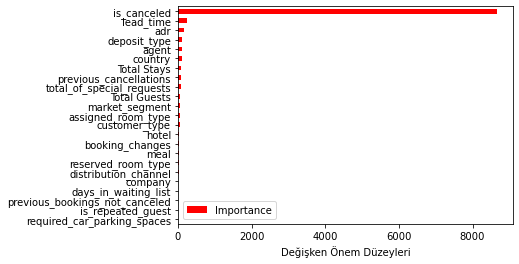

In [185]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh" , color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

# Yapay Sinir Ağları

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [128]:
mlpc = MLPClassifier().fit(X_train_scaled , y_train)
mlpc.coefs_

[array([[-0.26402882,  0.3038144 , -0.33157088, ...,  0.06975901,
          0.2809706 ,  0.07043809],
        [-0.06188692, -0.13235691, -0.32705129, ..., -0.35500909,
          0.20463022,  0.40487666],
        [ 0.73900139,  0.2079285 , -0.42192038, ..., -0.68457738,
         -0.0988023 ,  0.62189552],
        ...,
        [ 0.26382147,  0.03446879, -0.75852664, ...,  0.33060367,
          0.03392039, -0.42910096],
        [-0.60551337,  0.02142046,  0.62968984, ...,  0.09820478,
         -0.12565433, -0.26510978],
        [ 0.51542192,  0.12979738,  0.24299806, ..., -0.54250685,
          0.24421989,  0.44524667]]),
 array([[ 4.74545916e-01, -1.11518937e-01, -4.32963635e-01],
        [-7.60216922e-01,  3.32142809e-01,  7.76489012e-01],
        [ 5.95540253e-01,  3.79512942e-01, -8.25465038e-01],
        [-3.22261966e-01, -8.71730050e-02,  2.29736826e-01],
        [ 8.15882829e-01,  4.61632350e-03, -7.69363478e-01],
        [-5.72811841e-01,  9.55473505e-01,  6.13657205e-02],
       

In [129]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test , y_pred)

0.9901294634119061

Model Tuning

In [130]:
mlpc_params = {"alpha" : [0.1],
               "hidden_layer_sizes" : [(10,10),
                                       (100,100),
                                       (100),
                                       (3,5),
                                       (5,3)],
               "solver" : ["lbfgs","adam","sgd"],
               "activation" : ["relu","logistic"]}

In [131]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc , mlpc_params , cv = 10 , n_jobs = -1 , verbose = 2)
mlpc_cv_model.fit(X_train_scaled , y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(10, 10), (100, 100), 100,
                                                (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [133]:
print("En iyi paramtreler: " + str(mlpc_cv_model.best_params_))

En iyi paramtreler: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [134]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')
mlpc_tuned.fit(X_train_scaled , y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100))

In [135]:
y_pred = mlpc_tuned.predict(x_test)
accuracy_score(y_test , y_pred)

0.36224589659704165

In [177]:
clf_report_mlpc = classification_report(y_test, y_pred)
print(clf_report_mlpc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12955
           1       1.00      1.00      1.00     22461
           2       0.66      0.10      0.17       347

    accuracy                           0.99     35763
   macro avg       0.88      0.70      0.72     35763
weighted avg       0.99      0.99      0.99     35763



In [139]:
modeller = [
    knn_tuned,
    loj_model,
    #svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
]
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk =accuracy_score(y_test , y_pred)
    print("-"*28)
    print(isimler + ":")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 82.0205%
----------------------------
LogisticRegression:
Accuracy: 92.1735%
----------------------------
GaussianNB:
Accuracy: 78.5141%
----------------------------
MLPClassifier:
Accuracy: 36.2246%
----------------------------
DecisionTreeClassifier:
Accuracy: 99.0381%
----------------------------
RandomForestClassifier:
Accuracy: 99.0549%
----------------------------
GradientBoostingClassifier:
Accuracy: 99.1751%
----------------------------
CatBoostClassifier:
Accuracy: 99.1276%
----------------------------
LGBMClassifier:
Accuracy: 99.0493%
----------------------------
XGBClassifier:
Accuracy: 99.0745%


### ANN

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test  = scaler.transform(x_test)

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
X_train.shape

(83447, 23)

In [143]:
model = Sequential()

model.add(Dense(30 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [144]:
model.fit(x=X_train , y = y_train , epochs = 100 , validation_data = (X_test , y_test) , verbose = 1)

Epoch 1/100
2608/2608 [==============================] - 7s 2ms/step - loss: 0.0837 - val_loss: 0.0623
Epoch 2/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0633 - val_loss: 0.0573
Epoch 3/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0613 - val_loss: 0.0563
Epoch 4/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0601 - val_loss: 0.0562
Epoch 5/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0589 - val_loss: 0.0546
Epoch 6/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0580 - val_loss: 0.0555
Epoch 7/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0573 - val_loss: 0.0562
Epoch 8/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0564 - val_loss: 0.0529
Epoch 9/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0560 - val_loss: 0.0532
Epoch 10/100
2608/2608 [==============================] - 6s 2ms/step - l

2608/2608 [==============================] - 6s 2ms/step - loss: -65.8576 - val_loss: -30.9456
Epoch 79/100
2608/2608 [==============================] - 6s 2ms/step - loss: -70.9090 - val_loss: -30.9358
Epoch 80/100
2608/2608 [==============================] - 6s 2ms/step - loss: -76.2472 - val_loss: -33.8592
Epoch 81/100
2608/2608 [==============================] - 6s 2ms/step - loss: -81.4495 - val_loss: -35.3942
Epoch 82/100
2608/2608 [==============================] - 6s 2ms/step - loss: -86.9894 - val_loss: -35.6395
Epoch 83/100
2608/2608 [==============================] - 6s 2ms/step - loss: -93.0823 - val_loss: -42.2210
Epoch 84/100
2608/2608 [==============================] - 6s 2ms/step - loss: -100.1276 - val_loss: -45.6391
Epoch 85/100
2608/2608 [==============================] - 7s 3ms/step - loss: -104.8639 - val_loss: -43.4541
Epoch 86/100
2608/2608 [==============================] - 6s 2ms/step - loss: -114.9643 - val_loss: -46.0896
Epoch 87/100
2608/2608 [==============

In [145]:
model_kaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

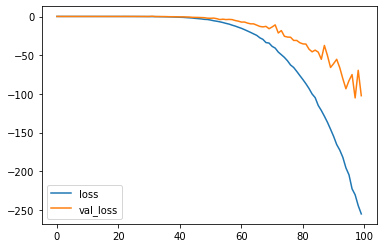

In [146]:
model_kaybi.plot()

In [147]:
model = Sequential()

model.add(Dense(30 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [148]:
early_stop = EarlyStopping(monitor = "val_loss" , mode='min' , verbose=1 , patience=25)

In [149]:
model.fit(x=X_train , y = y_train , epochs = 100 , validation_data = (X_test , y_test) , verbose = 1 , callbacks = [early_stop])

Epoch 1/100
2608/2608 [==============================] - 7s 2ms/step - loss: 0.0849 - val_loss: 0.0609
Epoch 2/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0632 - val_loss: 0.0584
Epoch 3/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0613 - val_loss: 0.0566
Epoch 4/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0600 - val_loss: 0.0580
Epoch 5/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0585 - val_loss: 0.0551
Epoch 6/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0578 - val_loss: 0.0558
Epoch 7/100
2608/2608 [==============================] - 7s 3ms/step - loss: 0.0572 - val_loss: 0.0539
Epoch 8/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0564 - val_loss: 0.0541
Epoch 9/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0553 - val_loss: 0.0549
Epoch 10/100
2608/2608 [==============================] - 6s 2ms/step - l

2608/2608 [==============================] - 6s 2ms/step - loss: -61.7440 - val_loss: -25.0024
Epoch 79/100
2608/2608 [==============================] - 6s 2ms/step - loss: -66.5196 - val_loss: -30.5628
Epoch 80/100
2608/2608 [==============================] - 6s 2ms/step - loss: -69.3475 - val_loss: -30.9493
Epoch 81/100
2608/2608 [==============================] - 6s 2ms/step - loss: -78.6292 - val_loss: -22.1918
Epoch 82/100
2608/2608 [==============================] - 6s 2ms/step - loss: -85.3398 - val_loss: -33.2013
Epoch 83/100
2608/2608 [==============================] - 6s 2ms/step - loss: -86.1233 - val_loss: -12.1007
Epoch 84/100
2608/2608 [==============================] - 6s 2ms/step - loss: -92.1859 - val_loss: -23.3783
Epoch 85/100
2608/2608 [==============================] - 6s 2ms/step - loss: -101.0798 - val_loss: -30.7499
Epoch 86/100
2608/2608 [==============================] - 6s 2ms/step - loss: -109.5982 - val_loss: -39.7050
Epoch 87/100
2608/2608 [===============

In [150]:
model_kaybi2 = pd.DataFrame(model.history.history)

<AxesSubplot:>

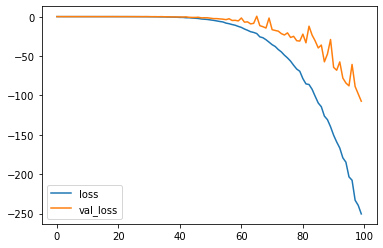

In [151]:
model_kaybi2.plot()

In [152]:
model = Sequential()

model.add(Dense(30 , activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(15 , activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(15 , activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [153]:
model.fit(x=X_train , y = y_train , epochs = 100 , validation_data = (X_test , y_test) , verbose = 1 , callbacks = [early_stop])

Epoch 1/100
2608/2608 [==============================] - 7s 3ms/step - loss: 0.2035 - val_loss: 0.0750
Epoch 2/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.1045 - val_loss: 0.0743
Epoch 3/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0958 - val_loss: 0.0725
Epoch 4/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0939 - val_loss: 0.0728
Epoch 5/100
2608/2608 [==============================] - 8s 3ms/step - loss: 0.0923 - val_loss: 0.0725
Epoch 6/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0920 - val_loss: 0.0722
Epoch 7/100
2608/2608 [==============================] - 7s 3ms/step - loss: 0.0905 - val_loss: 0.0722
Epoch 8/100
2608/2608 [==============================] - 6s 2ms/step - loss: 0.0891 - val_loss: 0.0715
Epoch 9/100
2608/2608 [==============================] - 7s 3ms/step - loss: 0.0882 - val_loss: 0.0698
Epoch 10/100
2608/2608 [==============================] - 7s 2ms/step - l

In [154]:
model_kaybi3 = pd.DataFrame(model.history.history)

<AxesSubplot:>

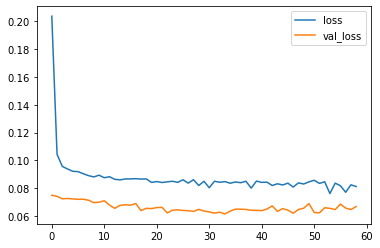

In [155]:
model_kaybi3.plot()

In [156]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [157]:
from sklearn.metrics import classification_report , confusion_matrix

In [158]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.71      0.03      0.06     12955
           1       0.63      0.99      0.77     22461
           2       0.00      0.00      0.00       347

    accuracy                           0.63     35763
   macro avg       0.45      0.34      0.28     35763
weighted avg       0.66      0.63      0.51     35763



In [159]:
print(confusion_matrix(y_test , predictions))

[[  386 12569     0]
 [  154 22307     0]
 [    0   347     0]]
